In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Read the data from the csv file
df = pd.read_csv("C://Users/555789/Downloads/us-counties.csv")
df.tail()

,date,county,state,fips,cases,deaths
51164,2020-04-11,Sublette,Wyoming,56035.0,1,0
51165,2020-04-11,Sweetwater,Wyoming,56037.0,7,0
51166,2020-04-11,Teton,Wyoming,56039.0,53,0
51167,2020-04-11,Uinta,Wyoming,56041.0,4,0
51168,2020-04-11,Washakie,Wyoming,56043.0,4,0


In [3]:
#Checking the null values
df.isnull().sum()

date        0
county      0
state       0
fips      687
cases       0
deaths      0
dtype: int64

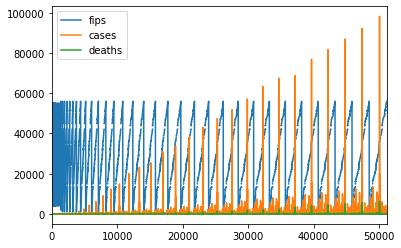

In [4]:
# Exploring the data
df.plot()

In [5]:
# Group the data by date, state, county
df2 = df.groupby(["date", "state", "county"])[['date', 'state', 'county', 'cases', 'deaths']].sum().reset_index()
df2.head()

,date,state,county,cases,deaths
0,2020-01-21,Washington,Snohomish,1,0
1,2020-01-22,Washington,Snohomish,1,0
2,2020-01-23,Washington,Snohomish,1,0
3,2020-01-24,Illinois,Cook,1,0
4,2020-01-24,Washington,Snohomish,1,0


In [6]:
# No of cases and deaths per state

df_state = df2.groupby(["state"])[['state', 'cases', 'deaths']].sum().sort_values(by = "cases", ascending = False).reset_index()
df_state.head()

,state,cases,deaths
0,New York,1912197,61205
1,New Jersey,538612,14089
2,California,235247,5639
3,Michigan,225892,9639
4,Massachusetts,194472,4093


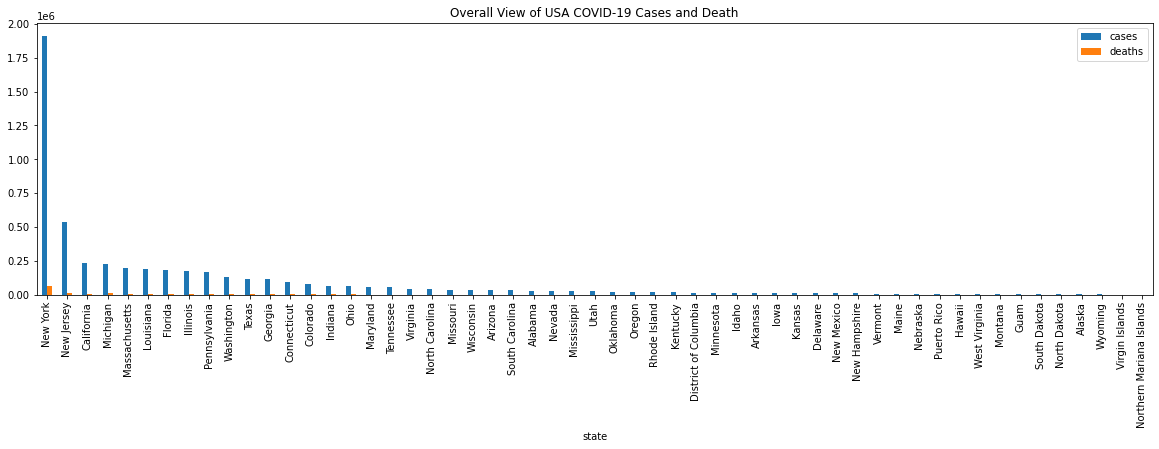

In [7]:
# No of cases, death vs state
df_state.plot(x="state", y=["cases", "deaths"], kind="bar", figsize=(20,5), title = "Overall View of USA COVID-19 Cases and Death")

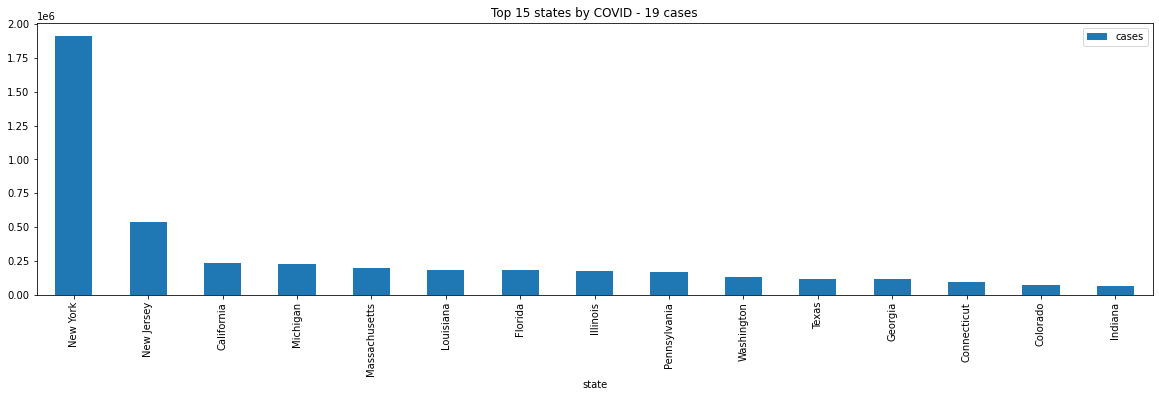

In [8]:
# Top 15 states by cases

df_state[0:15].plot(x="state", y=["cases"], kind="bar", figsize=(20,5), title = "Top 15 states by COVID - 19 cases")

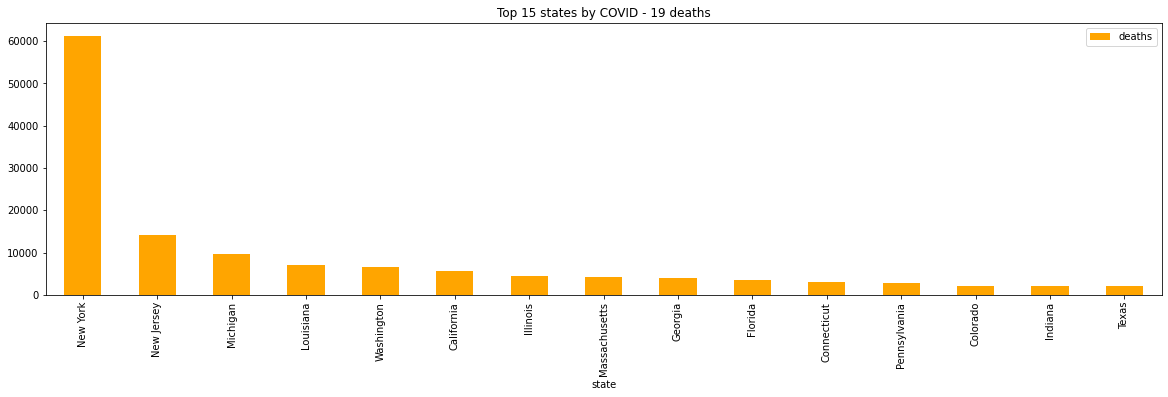

In [9]:
# Top 15 states by deaths
df_county = df2.groupby(["state"])[['state', 'cases', 'deaths']].sum().reset_index().sort_values(by = "deaths", ascending = False)
df_county[0:15].plot(x="state", y=["deaths"], kind="bar", figsize=(20,5), title = "Top 15 states by COVID - 19 deaths", color = "orange")

In [10]:
# Grouping the data by cases and death 
df_covid = df.groupby("date")[['cases', 'deaths']].sum().reset_index()
df_covid.tail()

,date,cases,deaths
77,2020-04-07,397752,12959
78,2020-04-08,429283,14779
79,2020-04-09,463689,16685
80,2020-04-10,496904,18720
81,2020-04-11,528422,20579


In [11]:
# Describe the data of Covid-19
df_covid.describe()

,cases,deaths
count,82.000000,82.000000
mean,62933.597561,1818.585366
std,132051.151415,4459.545221
min,1.000000,0.000000
25%,13.000000,0.000000
50%,96.000000,4.500000
75%,30934.000000,412.750000
max,528422.000000,20579.000000


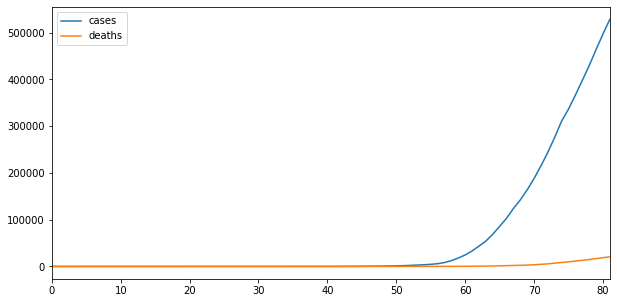

In [12]:
df_covid.plot(kind = 'line', figsize = (10,5))

In [13]:
# Daily Cases count - Converting to Timeseries data
df_cases = df.groupby(["date"])[['date', 'cases']].sum().reset_index()
print(df_cases.head())
print(df_cases.tail())

         date  cases
0  2020-01-21      1
1  2020-01-22      1
2  2020-01-23      1
3  2020-01-24      2
4  2020-01-25      3
          date   cases
77  2020-04-07  397752
78  2020-04-08  429283
79  2020-04-09  463689
80  2020-04-10  496904
81  2020-04-11  528422


In [14]:
# Daily Death count - Converting to Timeseries data
df_death = df.groupby(["date"])[['date', 'deaths']].sum().reset_index()
print(df_death.head())
print(df_death.tail())

         date  deaths
0  2020-01-21       0
1  2020-01-22       0
2  2020-01-23       0
3  2020-01-24       0
4  2020-01-25       0
          date  deaths
77  2020-04-07   12959
78  2020-04-08   14779
79  2020-04-09   16685
80  2020-04-10   18720
81  2020-04-11   20579


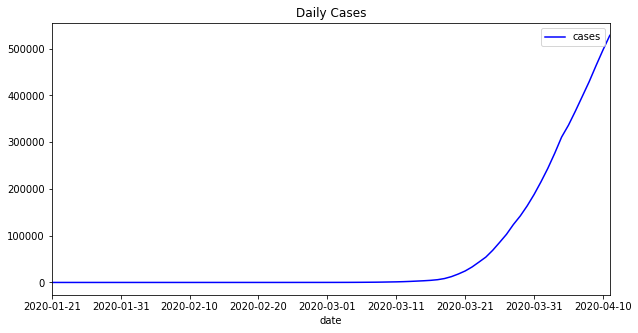

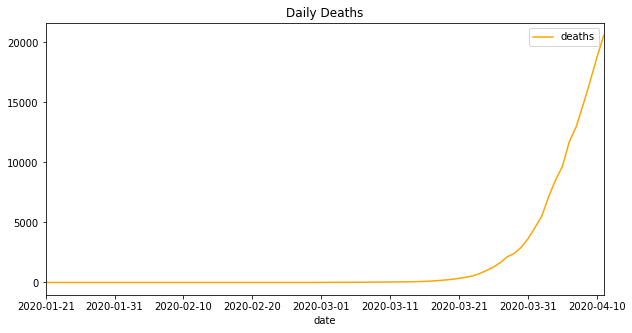

In [15]:
# Lets look at the plot for cases and deaths
df_cases.plot(x="date", y=["cases"], figsize=(10,5), title = "Daily Cases", color = "blue")
df_death.plot(x="date", y=["deaths"], figsize=(10,5), title = "Daily Deaths", color = "orange")

In [16]:
# Renaming the column to ds and y for fbprophet
df_cases = df_cases.rename(columns={"date": "ds", "cases": "y"}, errors="raise")
df_cases.tail()

,ds,y
77,2020-04-07,397752
78,2020-04-08,429283
79,2020-04-09,463689
80,2020-04-10,496904
81,2020-04-11,528422


In [17]:
# Normalizing the data
df_cases['y'] = np.log(df_cases['y'])
df_cases.head()

,ds,y
0,2020-01-21,0.000000
1,2020-01-22,0.000000
2,2020-01-23,0.000000
3,2020-01-24,0.693147
4,2020-01-25,1.098612


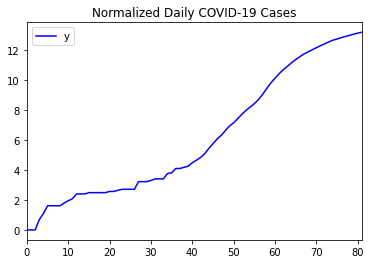

In [18]:
# Lets see the plot of the normalized data
df_cases.plot(title = "Normalized Daily COVID-19 Cases", color = "blue")

In [19]:
#Importing fbprophet library and Initialize the model
from fbprophet import Prophet
model = Prophet(growth='linear',seasonality_mode='additive')


Importing plotly failed. Interactive plots will not work.


In [20]:
#Splitting the data
train = df_cases[:60]
test = df_cases[60:]

In [21]:
# View the train data
train.tail()

,ds,y
55,2020-03-16,8.413387
56,2020-03-17,8.683555
57,2020-03-18,9.029418
58,2020-03-19,9.426500
59,2020-03-20,9.798405


In [22]:
# Fit the model
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
#Make future timeline
future = model.make_future_dataframe(periods=60)

In [24]:
# predicting the data
pred = model.predict(future)
pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
115,2020-05-15,25.241629,20.733191,30.262867
116,2020-05-16,25.492134,20.911779,30.708336
117,2020-05-17,25.807360,21.100152,31.213296
118,2020-05-18,26.132957,21.249567,31.674873
119,2020-05-19,26.356863,21.371520,32.026828


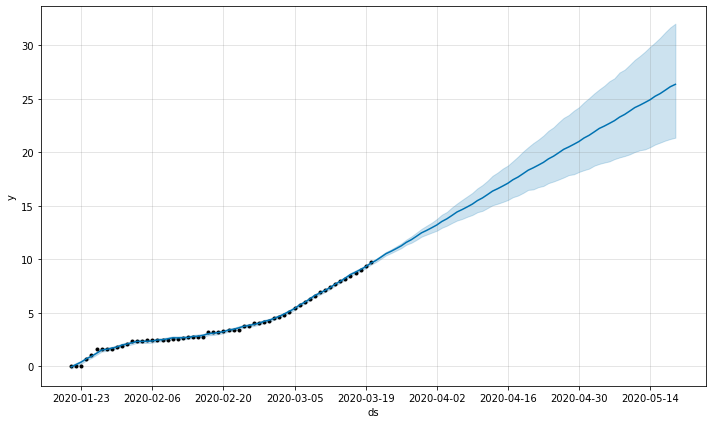

In [25]:
plt_pred = model.plot(pred)

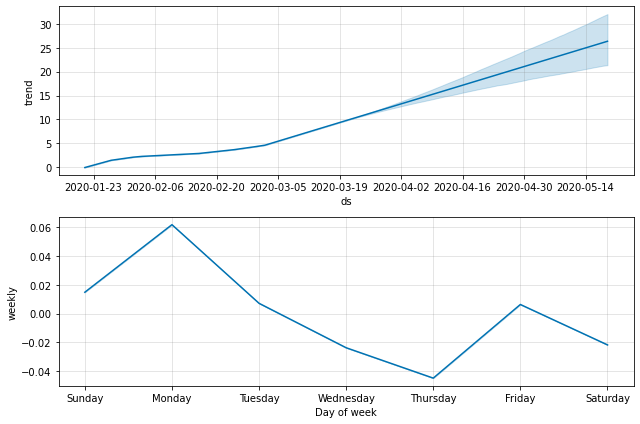

In [26]:
plt_comp = model.plot_components(pred)

In [27]:
test.head()

,ds,y
60,2020-03-21,10.107734
61,2020-03-22,10.406321
62,2020-03-23,10.680470
63,2020-03-24,10.900159
64,2020-03-25,11.138770


In [28]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='20 days', period='1 days', horizon = '30 days')
df_cv

INFO:fbprophet:Making 10 forecasts with cutoffs between 2020-02-10 00:00:00 and 2020-02-19 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-02-11,3.103819,2.696271,3.526849,2.564949,2020-02-10
1,2020-02-12,3.132839,2.748766,3.565050,2.639057,2020-02-10
2,2020-02-13,3.193629,2.745239,3.597707,2.708050,2020-02-10
3,2020-02-14,3.476083,3.085274,3.896766,2.708050,2020-02-10
4,2020-02-15,3.655780,3.226751,4.057152,2.708050,2020-02-10
...,...,...,...,...,...,...
295,2020-03-16,6.035416,5.605000,6.502438,8.413387,2020-02-19
296,2020-03-17,5.872107,5.446111,6.334865,8.683555,2020-02-19
297,2020-03-18,5.904318,5.437990,6.370654,9.029418,2020-02-19
298,2020-03-19,5.986163,5.540822,6.434593,9.426500,2020-02-19


In [30]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,0.252051,0.502046,0.418093,0.148809,0.134659,0.566667
1,4 days,0.288535,0.537155,0.451547,0.156691,0.134659,0.533333
2,5 days,0.319241,0.565014,0.483516,0.163229,0.113501,0.533333
3,6 days,0.328182,0.572872,0.494756,0.162166,0.115714,0.533333
4,7 days,0.287171,0.535884,0.470101,0.147928,0.126773,0.466667


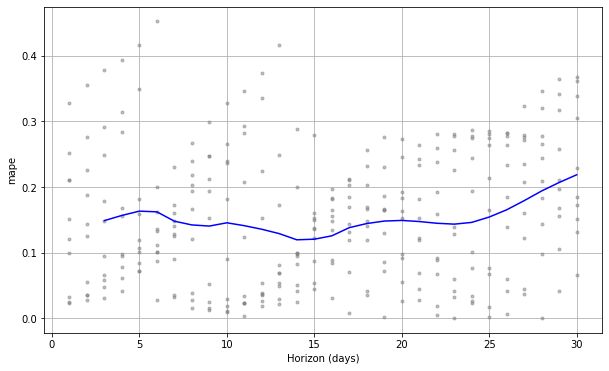

In [31]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [32]:
pred['y_hat'] = np.exp(pred.yhat)
pred['y_hat_low'] = np.exp(pred.yhat_lower)
pred['y_hat_up'] = np.exp(pred.yhat_upper)
test['y'] = np.exp(test.y)
print(pred[['ds', 'y_hat','y_hat_low','y_hat_up']].tail(60),test)

            ds         y_hat     y_hat_low      y_hat_up
60  2020-03-21  1.973870e+04  1.701329e+04  2.281192e+04
61  2020-03-22  2.705325e+04  2.314823e+04  3.158051e+04
62  2020-03-23  3.746488e+04  3.204106e+04  4.416029e+04
63  2020-03-24  4.686682e+04  3.946161e+04  5.566038e+04
64  2020-03-25  6.003929e+04  4.999086e+04  7.381383e+04
65  2020-03-26  7.767025e+04  6.286405e+04  9.726272e+04
66  2020-03-27  1.080183e+05  8.639684e+04  1.396897e+05
67  2020-03-28  1.387683e+05  1.041654e+05  1.871471e+05
68  2020-03-29  1.901915e+05  1.358619e+05  2.662612e+05
69  2020-03-30  2.633881e+05  1.838521e+05  3.797946e+05
70  2020-03-31  3.294863e+05  2.224872e+05  5.088549e+05
71  2020-04-01  4.220923e+05  2.674569e+05  6.766057e+05
72  2020-04-02  5.460426e+05  3.196209e+05  9.502764e+05
73  2020-04-03  7.593976e+05  4.219529e+05  1.428409e+06
74  2020-04-04  9.755785e+05  5.128965e+05  1.858453e+06
75  2020-04-05  1.337097e+06  6.594040e+05  2.820490e+06
76  2020-04-06  1.851689e+06  8

C:\Users\555789\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
